In [1]:
using Plots, LaTeXStrings, PerceptualColourMaps
pyplot(markerstrokecolor=false)

INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.5/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.5/PyPlot.ji for module PyPlot.
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.julia/v0.5/PerceptualColourMaps/src/cmap.jl:30
  likely near /Users/claudiopierard/.jul

Plots.PyPlotBackend()

Primero defino el mapeo de Hénon:

In [2]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

# Algoritmo para calcular áreas

In [3]:
Henon(0, 0, 1.4, 0.3)

(1.0,0.0)

In [4]:
function condiones_iniciales_2D(f::Function, t_range)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i])[1]
        CI[2, i] = f(t_range[i])[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D (generic function with 1 method)

In [5]:
σ(t) = cos(t), sin(t)

σ (generic function with 1 method)

In [6]:
G(t) = (1 - 1.4*cos(t)^2 + sin(t), cos(t))

G (generic function with 1 method)

In [7]:
t_rango = 0:0.01:2π
CI1 = condiones_iniciales_2D(σ, t_rango)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853

In [8]:
t_rango = 0:0.01:2π
CI2 = condiones_iniciales_2D(G, t_rango)

2×629 Array{Float64,2}:
 -0.4  -0.38986  -0.379441  -0.368745  …  -0.422431  -0.412942  -0.403171
  1.0   0.99995   0.9998     0.99955       0.999731   0.999913   0.999995


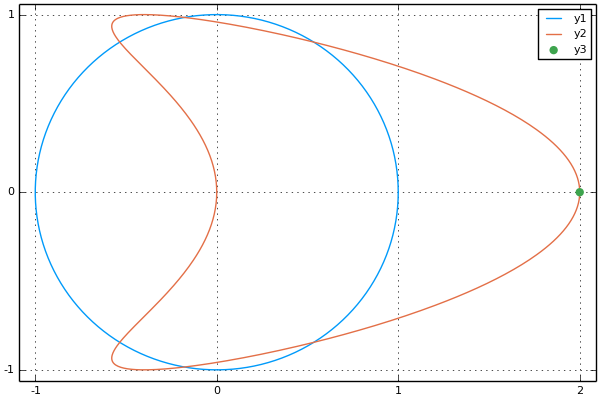

In [9]:
plot(CI1[1, :], CI1[2, :])
plot!(CI2[1, :], CI2[2,:])
#scatter!(rand(1)*4 -2, rand(1)*2 -1, leg=false)
scatter!(G(π/2))

In [10]:
function iterator(f::Function, X0, a, b, N)
    
    aux = copy(X0)
    orbit = zeros(size(aux))
    
    for j in 1:N
        
        for i in 1:length(aux[1, :])

            orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
            orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

        end
        
        aux = copy(orbit)
 
    end
    
    orbit
    
end 

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


iterator (generic function with 1 method)

In [11]:
I3 = iterator(Henon, CI1, 1.4, 0.3, 2)

2×629 Array{Float64,2}:
  1.076   1.0872     1.09837    1.1095    …   1.05009    1.06124    1.07243 
 -0.12   -0.116958  -0.113832  -0.110623     -0.126729  -0.123882  -0.120951


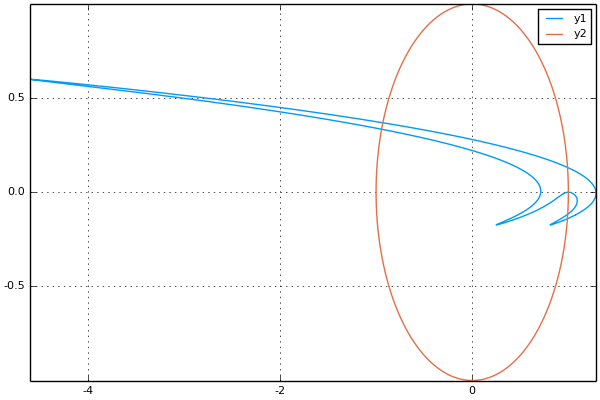

In [12]:
plot(I3[1,:], I3[2,:])
plot!(CI1[1,:], CI1[2,:])

In [13]:
function ξ(t) #parametrización cuadrado.
    t <= 2 && return (t-1, 1)
    t > 2 && t <= 4 && return (1, 3 - t)
    t > 4 && t <= 6 && return (5 - t , -1)
    t > 6 && return (-1, 7 - t)
end

ξ (generic function with 1 method)


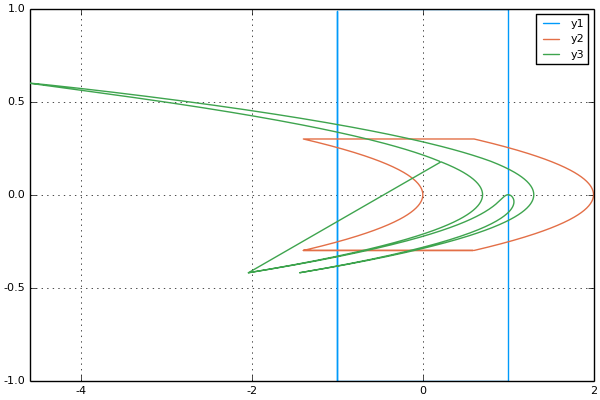

In [14]:
t2_rango = 0:0.01:8
CC1 = condiones_iniciales_2D(ξ, t2_rango)
CC2 = iterator(Henon, CC1, 1.4, 0.3, 1)
CC3 = iterator(Henon, CC1, 1.4, 0.3, 2)
plot(CC1[1, :], CC1[2, :])
plot!(CC2[1, :], CC2[2, :])
plot!(CC3[1, :], CC3[2, :])

## Primer método (Henon inverso) #nosirve

In [15]:
function Henon_inv(x, y, a, b)
    
    y/b , x + a*(y/b)^2 -1
    
end 

Henon_inv (generic function with 1 method)

In [16]:
CI2

2×629 Array{Float64,2}:
 -0.4  -0.38986  -0.379441  -0.368745  …  -0.422431  -0.412942  -0.403171
  1.0   0.99995   0.9998     0.99955       0.999731   0.999913   0.999995

In [17]:
CInv1 = iterator(Henon_inv, CI2, 1.4, 1, 1)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853


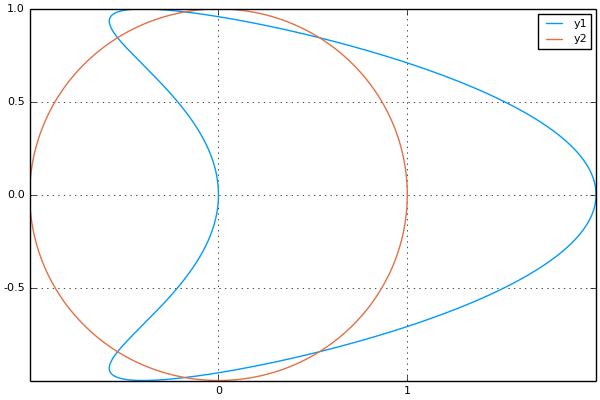

In [18]:
plot(CI2[1, :], CI2[2, :])
plot!(CInv1[1, :], CInv1[2, :])

In [19]:
function randinterval(n, min, max)
    
    rand(n) * (max - min) + min
    
end

randinterval (generic function with 1 method)

In [20]:
function area_henon(N, a, b, n)
    
    dentro = 0
    total = 0
    
    condIn = condiones_iniciales_2D(σ, 0:0.001:2π)
    CH = iterator(Henon, condIn, a, b, n)
    
    x_min = min(CH[1,:]...)
    x_max = max(CH[1,:]...)
    y_min = min(CH[2,:]...) 
    y_max = max(CH[2,:]...)
    
    for i in 1:N
        
        x = random_interval(1, x_min, x_max)[1]
        y = random_interval(1, y_min, y_max)[1]
        
        for i in 1:n
        
            x_n, y_n = Henon_inv(x, y, a, b)
            x =  x_n
            y = y_n
            
        end
        
        r = sqrt(x^2 + y^2)
        
        if r < 1 
            
            dentro += 1
            
        end
        
        total += 1
    end

    dentro
    #area = (x_max - x_min)*(y_max - y_min)
    #area * (dentro/total)
    #dentro/total
end

area_henon (generic function with 1 method)

In [21]:
area_henon(1000000, 1.4, 1, 1)

LoadError: LoadError: UndefVarError: random_interval not defined
while loading In[21], in expression starting on line 1

In [22]:
area_henon(1000000, 1.4, 1,  2)

LoadError: LoadError: UndefVarError: random_interval not defined
while loading In[22], in expression starting on line 1

## Método Inside or Outside


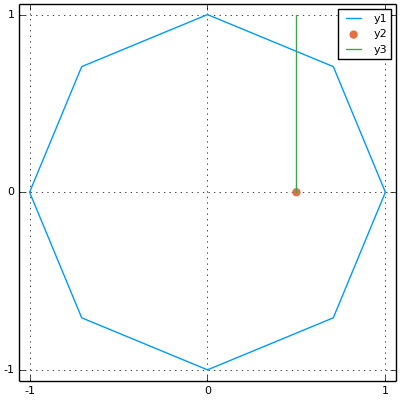

In [23]:
t_range = 0:2π/8:2π
plot(σ(t_range), size=(400, 400))
scatter!((0.5, 0.0))
plot!([(0.5, i) for i in 0:1])

In [24]:
function in_or_out(para, x, y)
    
    crossings = 0
    
    for i in 1:length(para[1,:])-1
        
        if x < para[1, i] && x < para[1, i+1] || x > para[1, i] && x > para[1, i+1]
            
            nothing
            
        elseif y > para[2,i] && y > para[2, i+1]
            
            nothing
    
        elseif y < para[2,i] && y < para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1] || x > para[1, i] && x < para[1, i+1]
                
                crossings += 1
                
            end
            
        elseif y > para[2, i] && y < para[2, i+1]
            
            if x > para[1, i] && x < para[1, i+1]
                
                y_c = para[2,i] + (para[2, i+1] - para[2, i])*(x - para[1, i])/(para[1, i+1] - para[1, i])
                
                if y_c > y
                    
                    crossings += 1
                    
                end
                
            end
            
        elseif y < para[2, i] && y > para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1]
                
                y_c = para[2, i+1] + (para[2, i] - para[2, i+1])*(x - para[1, i+1])/(para[1, i] - para[1, i+1])

                if y_c > y

                    crossings += 1

                end

            end
            
        end
        
    end
    
    if iseven(crossings)
        
        return false
        
    elseif isodd(crossings)
        
        return true
        
    end
    
end

in_or_out (generic function with 1 method)

In [25]:
@time in_or_out(CI1, 0.5, 0.5)

  0.076706 seconds (18.57 k allocations: 858.891 KB)


true

In [26]:
randinterval(1, 2, 2.5)

1-element Array{Float64,1}:
 2.00337

In [27]:
in_or_out(CI1, .2, -.1)

true

In [28]:
function find_area(Σ::Function, t_range, x_range, y_range, N)
    
    condIn = condiones_iniciales_2D(σ, t_range)
    inside = 0
    total = 0
    area = (x_range[end] - x_range[1]) * (y_range[end] - y_range[1])
    
    for i in 1:N
        
        x = randinterval(1, x_range[1], x_range[end])[1]
        y = randinterval(1, y_range[1], y_range[end])[1]
        
        if in_or_out(condIn, x, y)
            
            inside += 1
            
        end
        
        total += 1
    end

    area * inside / total
    
end

find_area (generic function with 1 method)

In [29]:
@time find_area(σ, t_rango, -1:1, -1:1, 100000)

  0.407230 seconds (822.47 k allocations: 551.760 MB, 23.33% gc time)


3.13692

In [30]:
@time find_area(G, t_rango, -1:2, -1:1, 1000000)

  3.691925 seconds (8.00 M allocations: 5.379 GB, 26.03% gc time)


3.143082


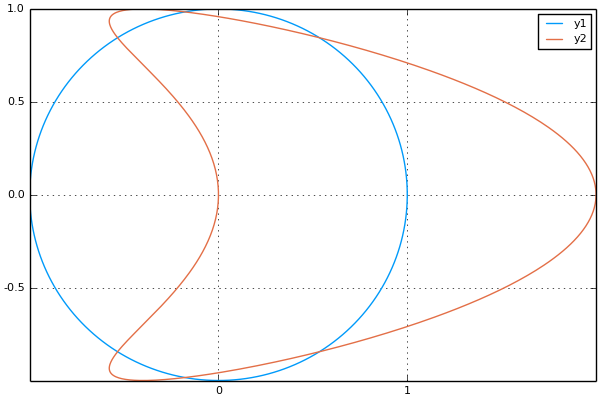

In [31]:
plot(CI1[1, :], CI1[2, :])
plot!(CI2[1, :], CI2[2,:])

In [32]:
find_area(G, 0.0:0.001:2π, 100000)

LoadError: LoadError: MethodError: no method matching find_area(::#G, ::FloatRange{Float64}, ::Int64)
Closest candidates are:
  find_area(::Function, ::Any, ::Any, !Matched::Any, !Matched::Any) at In[28]:3
while loading In[32], in expression starting on line 1

In [33]:
@time find_area(G, t_rango,-1:2, -1:1, 100000)

  0.409690 seconds (802.52 k allocations: 550.891 MB, 26.68% gc time)


3.16686

## Hénon con $a = 1.4 \ b = 1$  

In [34]:
t_rango = 0:0.001:2π
CI1_1 = condiones_iniciales_2D(σ, t_rango)
CI1_2 = iterator(Henon, CI1_1, 1.4, 1, 1)
CI1_3 = iterator(Henon, CI1_2, 1.4, 1, 1)
CI1_4 = iterator(Henon, CI1_3, 1.4, 1, 1)

2×6284 Array{Float64,2}:
 -3.81585  -3.82041  -3.82498  -3.82954  …  -3.80585  -3.81043  -3.815  
  1.776     1.77712   1.77824   1.77936      1.77355   1.77467   1.77579


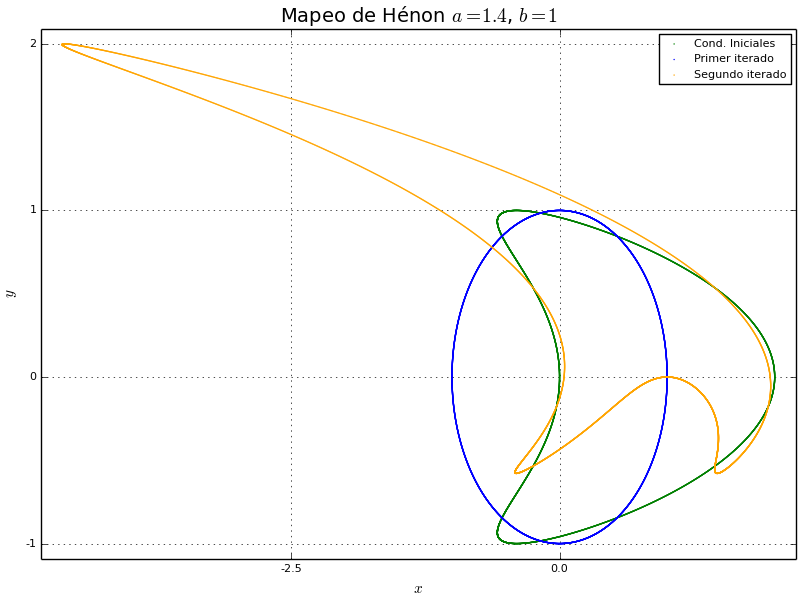

In [35]:
scatter(CI1_2[1,:], CI1_2[2,:], markersize=(1), markercolor=:green, label=("Cond. Iniciales"), size=(800, 600))
scatter!(CI1_1[1,:], CI1_1[2,:], markersize=(1), markercolor=:blue, label=("Primer iterado"))
scatter!(CI1_3[1,:], CI1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI4[1,:], CI4[2,:], markersize=(1), markercolor=:red, leg=false)
xlabel!(L"x")
ylabel!(L"y")
title!(L"Mapeo de Hénon $a = 1.4$, $b=1$")

In [36]:
J(t) = (1 - 1.4*(1 -1.4 * cos(t)^2 + sin(t))^2 + cos(t), 1 -1.4 * cos(t)^2 + sin(t) )

J (generic function with 1 method)

In [37]:
CI3_param = condiones_iniciales_2D(J, t_rango)

2×6284 Array{Float64,2}:
  1.776   1.77712    1.77824    1.77936   …   1.77355    1.77467    1.77579 
 -0.4    -0.398999  -0.397994  -0.396987     -0.402179  -0.401183  -0.400185


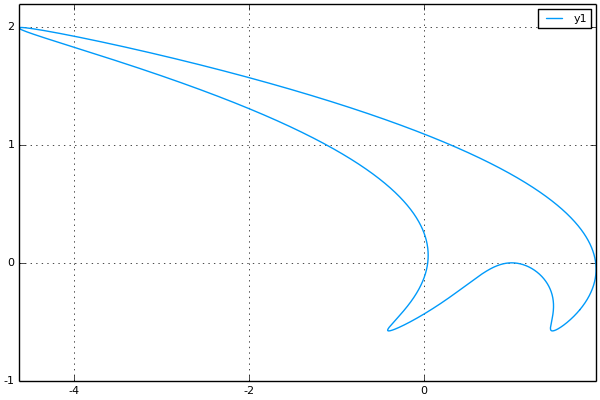

In [38]:
plot(CI3_param[1, :], CI3_param[2, :], ylims = (-1, 2.2))

In [39]:
@time find_area(J, t_rango, -5:2, -1:2.2, 1000000)

 27.264460 seconds (9.04 M allocations: 47.476 GB, 21.49% gc time)


3.140949

## Hénon con $a = 1.4 \ b = 0.3$  

In [40]:
t_rango = 0:0.001:2π
CI03_1 = condiones_iniciales_2D(σ, t_rango)
CI03_2 = iterator(Henon, CI03_1, 1.4, 0.3, 1)
CI03_3 = iterator(Henon, CI03_2, 1.4, 0.3, 1)
CI03_4 = iterator(Henon, CI03_3, 1.4, 0.3, 1)

2×6284 Array{Float64,2}:
 -0.740886  -0.743962  -0.747041  …  -0.734175  -0.737244  -0.740317
  0.3228     0.323136   0.323472      0.322066   0.322402   0.322738


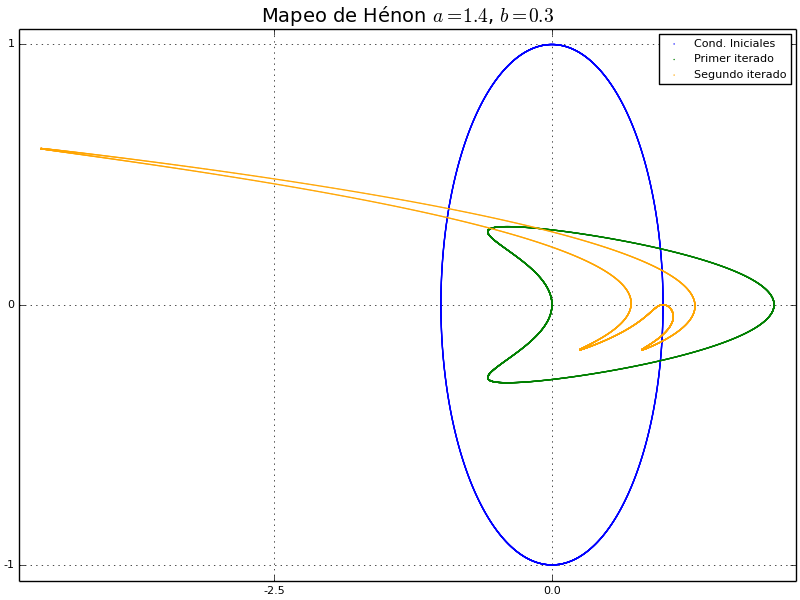

In [41]:
scatter(CI03_1[1,:], CI03_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"), size=(800,600))
scatter!(CI03_2[1,:], CI03_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI03_3[1,:], CI03_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI03_4[1,:], CI03_4[2,:], markersize=(1), markercolor=:red, leg=false)
title!(L"Mapeo de Hénon $a = 1.4$, $b=0.3$")

In [42]:
K(t) = (1 - 1.4*cos(t)^2 + sin(t), 0.3*cos(t))

K (generic function with 1 method)

In [43]:
CK2 = condiones_iniciales_2D(K, t_rango)

2×6284 Array{Float64,2}:
 -0.4  -0.398999  -0.397994  -0.396987  …  -0.402179  -0.401183  -0.400185
  0.3   0.3        0.299999   0.299999      0.299999   0.3        0.3     


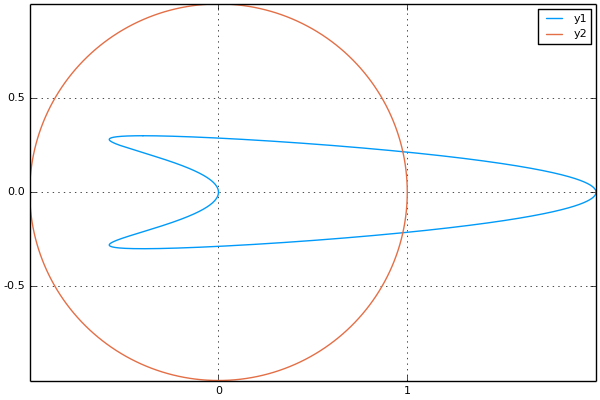

In [44]:
plot(CK2[1,:], CK2[2,:])
plot!(CI1[1,:], CI1[2,:])

In [45]:
find_area(σ, t_rango, -1:1, -1:2, 1000000)

3.140268

In [46]:
find_area(K, t_rango, -1:1, -1:2, 1000000)

3.140262

## Cálculo de error en método de Monte Carlo

In [47]:
CI1

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853

In [48]:
find_area(σ, t_rango, -1:1, -1:1, 100000)

3.14384

In [49]:
f = 0
for i in 1:9
    
    f += find_area(σ, t_rango, -1:1, -1:1, 1000000)
    
end
f = f/9

LoadError: LoadError: InterruptException:
while loading In[49], in expression starting on line 2

In [50]:
f² =  0
for i in 1:9
    
    f² += (find_area(σ, t_rango, -1:1, -1:1, 1000000))^2
    
end
f² = f²/9

LoadError: LoadError: InterruptException:
while loading In[50], in expression starting on line 2

In [51]:
f^2

9.874149843856001

In [52]:
f²

0

In [53]:
σ_e = f² - f^2

-9.874149843856001

In [54]:
σ_e *100 /f

-314.2316

In [55]:
using Colors

In [56]:
c = colorant"red"
c = parse(Colorant, "red")

In [57]:
C(g::ColorGradient) = RGB[g[z] for z=linspace(5,10,30)]
g = 

LoadError: LoadError: syntax: incomplete: premature end of input
while loading In[57], in expression starting on line 2

In [58]:
cgrad() |> C

In [59]:
blues= 
cgrad("RdBu") |> C

LoadError: LoadError: MethodError: no method matching cgrad_colors(::String)
Closest candidates are:
  cgrad_colors(!Matched::Array{ColorTypes.RGBA{Float64},1}) at /Users/claudiopierard/.julia/v0.5/PlotUtils/src/color_gradients.jl:68
  cgrad_colors(!Matched::PlotUtils.ColorGradient) at /Users/claudiopierard/.julia/v0.5/PlotUtils/src/color_gradients.jl:67
  cgrad_colors(!Matched::Symbol) at /Users/claudiopierard/.julia/v0.5/PlotUtils/src/color_gradients.jl:66
  ...
while loading In[59], in expression starting on line 1

In [60]:
colormap("GeBu")

LoadError: LoadError: ArgumentError: Unknown colormap: gebu
while loading In[60], in expression starting on line 1

In [61]:
"""Funcion que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set_Henon(a,b,xrange,yrange,maxiter,R)
    
    mx=length(xrange)
    my=length(yrange)
    iterandos=zeros(my,mx) 
    for i in 1:mx
        for j in 1:my
            x=xrange[i]
            y=yrange[my+1-j]
                for k in 1:maxiter
                x,y=Henon(x,y,a,b)
                iterandos[j,i]=k
                    if 
                    sqrt(x^2+y^2)>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end

Julia_set_Henon

In [62]:
xrange=-2:1/100:2
yrange=-3:1/100:5
m=80
R=2
a=1.4
b=1

1

In [63]:
V = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [64]:
ases = [0, 0.5, 1.0, 1.4, 1.5]

5-element Array{Float64,1}:
 0.0
 0.5
 1.0
 1.4
 1.5

In [65]:
colormap("RdBu")

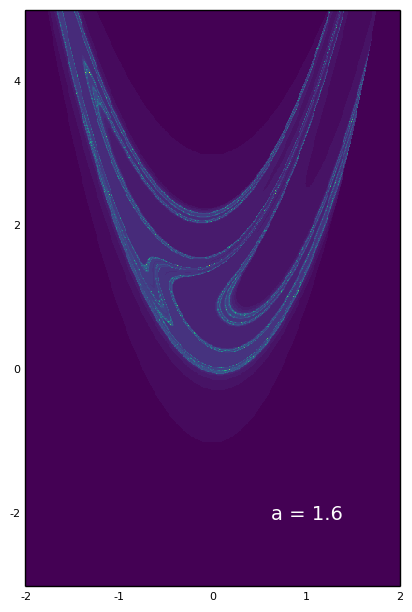

INFO: Saved animation to /Users/claudiopierard/2017-1_TSFisComp/proys/Fernando_Oscar_Claudio/tmp.gif


Plots.AnimatedGif("/Users/claudiopierard/2017-1_TSFisComp/proys/Fernando_Oscar_Claudio/tmp.gif")

In [70]:
ases = 0:0.1:1.6
@gif for i=1:length(ases)
    
    Ima=Julia_set_Henon(ases[i], 1, xrange,-yrange,m,R)
    heatmap(xrange, yrange, Ima, cbar=false, color=:viridis ,
    size = (400, 600), yflip=false, annotations=(1, -2, text("a = $(ases[i])", :white)))

end every 1

## Referencias 
 1. Finding Areas Using the Monte Carlo Method. http://commons.bcit.ca/math/entertainment/inout/index.html
 2. The Inside or Outside Problem. http://commons.bcit.ca/math/entertainment/inout/index.html 